# Overlap Analysis

In [2]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Cannot find header.dxf (GDAL_DATA is not defined)


# Load data

- Krill population
- Mean sequestration time
- Krill catch

Rename the variable when needed and transform into dataset

Create a joined dataframe

In [3]:
# load the krill and catch data 
os.chdir('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/')

krill_pop = xr.open_dataset('Krill_biomass_final.nc')['krill_adult_log']
catch = xr.open_dataset('Krill_catch_array_final_all.nc')
catch = catch.rename_vars({'__xarray_dataarray_variable__' : 'krill_catch_density_log' })

In [4]:
# transform into dataframe
krill_pop = krill_pop.to_dataframe().reset_index().drop(['time'], axis =1) # 3600 rows × 3 columns
catch = catch.to_dataframe().reset_index().drop(['variable'], axis =1) # 940 rows × 3 columns

In [5]:
# load the different files of the mean time seq
os.chdir('./Key_Areas_krill_carbon_sequestration/sensitivity_analyses/')

no_dep = xr.open_dataset('Mean_time_seq_no_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

T_dep = xr.open_dataset('Mean_time_seq_T_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
O2_dep = xr.open_dataset('Mean_time_seq_O2_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

O2_T_dep = xr.open_dataset('Mean_time_seq_O2_T_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_Kremin = xr.open_dataset('Mean_time_seq_high_Kremin.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_Kremin = xr.open_dataset('Mean_time_seq_low_Kremin.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_Wsink = xr.open_dataset('Mean_time_seq_high_Wsink.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_Wsink = xr.open_dataset('Mean_time_seq_low_Wsink.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_KO2 = xr.open_dataset('Mean_time_seq_high_KO2.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_KO2 = xr.open_dataset('Mean_time_seq_low_KO2.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

altern_Tdep = xr.open_dataset('Mean_time_seq_alternative_Tdep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

In [6]:
no_dep = no_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
T_dep = T_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
O2_dep = O2_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

O2_T_dep = O2_T_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_Kremin = high_Kremin.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_Kremin = low_Kremin.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_Wsink = high_Wsink.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_Wsink = low_Wsink.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_KO2 = high_KO2.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_KO2 = low_KO2.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

altern_Tdep = altern_Tdep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

#  Create the dataset
## 1. Create a dataset without NAN or "false zeros" that gather all three components

In [7]:
# remove the NaN and "false zeros" in the case of krill pop
krill_pop = krill_pop.dropna()
krill_pop = krill_pop[krill_pop['krill_adult_log'] != 0]
krill_pop.set_index(['latitude', 'longitude'], inplace = True) #1648  rows × 3 columns

In [8]:
catch = catch.dropna()
catch.set_index(['latitude', 'longitude'], inplace = True)

### 2. Calculate the 1/3 quantiles
We calculate the quantile on datasets that have only the non-NaN rows, and no "falls zeros" in the case of krill pop, so it doesn't biais the quantile with many meaningless zeros. 
However, on the plot we use the datasets where all three components are gathered and rows where catch are "NaN" (beacuse no catch were reported there, are filled with 0 in order not the remove many points that will not appear on the plot otherwise.

In [9]:
krill_quantile = krill_pop.quantile(q=[0.3333, 0.6666])
catch_quantile = catch.quantile(q=[0.3333, 0.6666])

In [10]:
no_dep_quantile  = no_dep.quantile(q=[0.3333, 0.6666])
T_dep_quantile = T_dep.quantile(q=[0.3333, 0.6666])
O2_dep_quantile = O2_dep.quantile(q=[0.3333, 0.6666])
O2_T_dep_quantile = O2_T_dep.quantile(q=[0.3333, 0.6666])
high_Kremin_quantile = high_Kremin.quantile(q=[0.3333, 0.6666])
low_Kremin_quantile = low_Kremin.quantile(q=[0.3333, 0.6666])
high_Wsink_quantile = high_Wsink.quantile(q=[0.3333, 0.6666])
low_Wsink_quantile = low_Wsink.quantile(q=[0.3333, 0.6666])
high_KO2_quantile = high_KO2.quantile(q=[0.3333, 0.6666])
low_KO2_quantile = low_KO2.quantile(q=[0.3333, 0.6666])
altern_Tdep_quantile = altern_Tdep.quantile(q=[0.3333, 0.6666])

# Identify the KAKS

We select the rows corresponding to points on each zone of interrest :
- upper right : both krill and time of sequestration are hight. Thus potential conflict between the towo 'services' (fishing and carbon seque0stration). Areas to protect.
- lower right : abundant krill but low time of sequestration: areas less impact for carbon sequesration where the trade off between exploitation and carbon sequestration may be in favor of sustainable fishing (while accounting for other trade offs).
- upper left : fewer krill but time of sequestration is hight. Areas with less issue with fishing bit highly important to protect from a caborn point of view.


### upper right for all time seq versions

In [11]:
HK = krill_pop[krill_pop['krill_adult_log'] > float(krill_quantile.iloc[1])]

HS = no_dep[no_dep['mean_seq_time']> float(no_dep_quantile.iloc[1])]
UR_no_dep = HK.join(HS, how='inner') # 385
UR_no_dep['label'] = 3

HS = T_dep[T_dep['mean_seq_time']> float(T_dep_quantile.iloc[1])]
UR_T_dep = HK.join(HS, how='inner') 
UR_T_dep['label'] = 3

HS = O2_dep[O2_dep['mean_seq_time']> float(O2_dep_quantile.iloc[1])]
UR_O2_dep = HK.join(HS, how='inner')  
UR_O2_dep['label'] = 3

HS = O2_T_dep[O2_T_dep['mean_seq_time']> float(O2_T_dep_quantile.iloc[1])]
UR_O2_T_dep = HK.join(HS, how='inner') 
UR_O2_T_dep['label'] = 3

HS = high_Kremin[high_Kremin['mean_seq_time']> float(high_Kremin_quantile.iloc[1])]
UR_high_Kremin = HK.join(HS, how='inner') 
UR_high_Kremin['label'] = 3

HS = low_Kremin[low_Kremin['mean_seq_time']> float(low_Kremin_quantile.iloc[1])]
UR_low_Kremin = HK.join(HS, how='inner')
UR_low_Kremin['label'] = 3

HS = high_Wsink[high_Wsink['mean_seq_time']> float(high_Wsink_quantile.iloc[1])]
UR_high_Wsink = HK.join(HS, how='inner') 
UR_high_Wsink['label'] = 3

HS = low_Wsink[low_Wsink['mean_seq_time']> float(low_Wsink_quantile.iloc[1])]
UR_low_Wsink = HK.join(HS, how='inner')
UR_low_Wsink['label'] = 3

HS = high_KO2[high_KO2['mean_seq_time']> float(high_KO2_quantile.iloc[1])]
UR_high_KO2 = HK.join(HS, how='inner') 
UR_high_KO2['label'] = 3

HS = low_KO2[low_KO2['mean_seq_time']> float(low_KO2_quantile.iloc[1])]
UR_low_KO2 = HK.join(HS, how='inner') 
UR_low_KO2['label'] = 3

HS = altern_Tdep[altern_Tdep['mean_seq_time']> float(altern_Tdep_quantile.iloc[1])]
UR_altern_Tdep = HK.join(HS, how='inner') 
UR_altern_Tdep['label'] = 3

C:\Users\anael\AppData\Local\Temp\ipykernel_28172\1859984437.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  HK = krill_pop[krill_pop['krill_adult_log'] > float(krill_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\1859984437.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  HS = no_dep[no_dep['mean_seq_time']> float(no_dep_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\1859984437.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  HS = T_dep[T_dep['mean_seq_time']> float(T_dep_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\1859984437.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise

### Lower right for all versions

In [12]:
HK = krill_pop[krill_pop['krill_adult_log'] > float(krill_quantile.iloc[1])]

LS = no_dep[no_dep['mean_seq_time']< float(no_dep_quantile.iloc[1])]
LR_no_dep = HK.join(LS, how='inner') # 385
LR_no_dep['label'] = 2

LS = T_dep[T_dep['mean_seq_time']< float(T_dep_quantile.iloc[1])]
LR_T_dep = HK.join(LS, how='inner') 
LR_T_dep['label'] = 2

LS = O2_dep[O2_dep['mean_seq_time']< float(O2_dep_quantile.iloc[1])]
LR_O2_dep = HK.join(LS, how='inner')  
LR_O2_dep['label'] = 2

LS = O2_T_dep[O2_T_dep['mean_seq_time']< float(O2_T_dep_quantile.iloc[1])]
LR_O2_T_dep = HK.join(LS, how='inner') 
LR_O2_T_dep['label'] = 2

LS = high_Kremin[high_Kremin['mean_seq_time']< float(high_Kremin_quantile.iloc[1])]
LR_high_Kremin = HK.join(LS, how='inner') 
LR_high_Kremin['label'] = 2

LS = low_Kremin[low_Kremin['mean_seq_time']< float(low_Kremin_quantile.iloc[1])]
LR_low_Kremin = HK.join(LS, how='inner')
LR_low_Kremin['label'] = 2

LS = high_Wsink[high_Wsink['mean_seq_time']< float(high_Wsink_quantile.iloc[1])]
LR_high_Wsink = HK.join(LS, how='inner') 
LR_high_Wsink['label'] = 2

LS = low_Wsink[low_Wsink['mean_seq_time']< float(low_Wsink_quantile.iloc[1])]
LR_low_Wsink = HK.join(LS, how='inner')
LR_low_Wsink['label'] = 2

LS = high_KO2[high_KO2['mean_seq_time']< float(high_KO2_quantile.iloc[1])]
LR_high_KO2 = HK.join(LS, how='inner') 
LR_high_KO2['label'] = 2

LS = low_KO2[low_KO2['mean_seq_time']< float(low_KO2_quantile.iloc[1])]
LR_low_KO2 = HK.join(LS, how='inner') 
LR_low_KO2['label'] = 2

LS = altern_Tdep[altern_Tdep['mean_seq_time']< float(altern_Tdep_quantile.iloc[1])]
LR_altern_Tdep = HK.join(LS, how='inner') 
LR_altern_Tdep['label'] = 2

C:\Users\anael\AppData\Local\Temp\ipykernel_28172\286930729.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  HK = krill_pop[krill_pop['krill_adult_log'] > float(krill_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\286930729.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  LS = no_dep[no_dep['mean_seq_time']< float(no_dep_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\286930729.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  LS = T_dep[T_dep['mean_seq_time']< float(T_dep_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\286930729.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a T

### Upper left for all versions

In [13]:
LK = krill_pop[krill_pop['krill_adult_log'] < float(krill_quantile.iloc[1])]

HS = no_dep[no_dep['mean_seq_time']> float(no_dep_quantile.iloc[1])]
UL_no_dep = LK.join(HS, how='inner') # 385
UL_no_dep['label'] = 1

HS = T_dep[T_dep['mean_seq_time']> float(T_dep_quantile.iloc[1])]
UL_T_dep = LK.join(HS, how='inner') 
UL_T_dep['label'] = 1

HS = O2_dep[O2_dep['mean_seq_time']> float(O2_dep_quantile.iloc[1])]
UL_O2_dep = LK.join(HS, how='inner')  
UL_O2_dep['label'] = 1

HS = O2_T_dep[O2_T_dep['mean_seq_time']> float(O2_T_dep_quantile.iloc[1])]
UL_O2_T_dep = LK.join(HS, how='inner') 
UL_O2_T_dep['label'] = 1

HS = high_Kremin[high_Kremin['mean_seq_time']> float(high_Kremin_quantile.iloc[1])]
UL_high_Kremin = LK.join(HS, how='inner') 
UL_high_Kremin['label'] = 1

HS = low_Kremin[low_Kremin['mean_seq_time']> float(low_Kremin_quantile.iloc[1])]
UL_low_Kremin = LK.join(HS, how='inner')
UL_low_Kremin['label'] = 1

HS = high_Wsink[high_Wsink['mean_seq_time']> float(high_Wsink_quantile.iloc[1])]
UL_high_Wsink = LK.join(HS, how='inner') 
UL_high_Wsink['label'] = 1

HS = low_Wsink[low_Wsink['mean_seq_time']> float(low_Wsink_quantile.iloc[1])]
UL_low_Wsink = LK.join(HS, how='inner')
UL_low_Wsink['label'] = 1

HS = high_KO2[high_KO2['mean_seq_time']> float(high_KO2_quantile.iloc[1])]
UL_high_KO2 = LK.join(HS, how='inner') 
UL_high_KO2['label'] = 1

HS = low_KO2[low_KO2['mean_seq_time']> float(low_KO2_quantile.iloc[1])]
UL_low_KO2 = LK.join(HS, how='inner') 
UL_low_KO2['label'] = 1

HS = altern_Tdep[altern_Tdep['mean_seq_time']> float(altern_Tdep_quantile.iloc[1])]
UL_altern_Tdep = LK.join(HS, how='inner') 
UL_altern_Tdep['label'] = 1

C:\Users\anael\AppData\Local\Temp\ipykernel_28172\136338382.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  LK = krill_pop[krill_pop['krill_adult_log'] < float(krill_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\136338382.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  HS = no_dep[no_dep['mean_seq_time']> float(no_dep_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\136338382.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  HS = T_dep[T_dep['mean_seq_time']> float(T_dep_quantile.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_28172\136338382.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a T

### concatenate for all versions

In [14]:
## Concatenate the three dataframe together
zones_no_dep = pd.concat([UR_no_dep, LR_no_dep, UL_no_dep])
zones_T_dep = pd.concat([UR_T_dep, LR_T_dep, UL_T_dep])
zones_O2_dep = pd.concat([UR_O2_dep, LR_O2_dep, UL_O2_dep])
zones_02_T_dep = pd.concat([UR_O2_T_dep, LR_O2_T_dep, UL_O2_T_dep])

zones_high_Kremin = pd.concat([UR_high_Kremin, LR_high_Kremin, UL_high_Kremin])
zones_low_Kremin = pd.concat([UR_low_Kremin, LR_low_Kremin, UL_low_Kremin])

zones_high_Wsink = pd.concat([UR_high_Wsink, LR_high_Wsink, UL_high_Wsink])
zones_low_Wsink = pd.concat([UR_low_Wsink, LR_low_Wsink, UL_low_Wsink])

zones_high_KO2 = pd.concat([UR_high_KO2, LR_high_KO2, UL_high_KO2])
zones_low_KO2 = pd.concat([UR_low_KO2, LR_low_KO2, UL_low_KO2])

zones_altern_Tdep = pd.concat([UR_altern_Tdep, LR_altern_Tdep, UL_altern_Tdep])

## Mesuare of certainty of the KAKS
count for each cell the number of occurance in the different versions (only for KAKS => label = 3)

In [15]:
UR_T_dep.drop(['krill_adult_log', 'mean_seq_time'], axis=1)

label
latitude longitude       
-75      -177           3
         -171           3
         -165           3
         -163           3
         -159           3
...                   ...
-53       17            3
          19            3
          23            3
          25            3
          27            3

[386 rows x 1 columns]

In [16]:
# join all versions together only for the KAKS (label = 3) so UR
all_KAKS = UR_no_dep.drop(['krill_adult_log', 'mean_seq_time'], axis=1).join(UR_T_dep.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer',  rsuffix='_T_dep')
all_KAKS = all_KAKS.join(UR_O2_dep.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_02_dep')
all_KAKS = all_KAKS.join(UR_O2_T_dep.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_02_T_dep')
all_KAKS = all_KAKS.join(UR_high_Kremin.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_Hkrem')
all_KAKS = all_KAKS.join(UR_low_Kremin.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_Lkrem')
all_KAKS = all_KAKS.join(UR_high_Wsink.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_HWsink')
all_KAKS = all_KAKS.join(UR_low_Wsink.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_LWsink')
all_KAKS = all_KAKS.join(UR_high_KO2.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_HKO2')
all_KAKS = all_KAKS.join(UR_low_KO2.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_LKO2')
all_KAKS = all_KAKS.join(UR_altern_Tdep.drop(['krill_adult_log', 'mean_seq_time'], axis=1), how='outer', rsuffix='_alt_T')
# for each row count the number of 3 out of the 11 column
# Add new column with the count
all_KAKS['degree_of_certainty'] = 100*(all_KAKS.count(axis=1)/11)
all_KAKS

label  label_T_dep  label_02_dep  label_02_T_dep  \
latitude longitude                                                     
-75      -177         3.0          3.0           3.0             3.0   
         -171         3.0          3.0           3.0             3.0   
         -165         3.0          3.0           3.0             NaN   
         -163         3.0          3.0           3.0             NaN   
         -159         3.0          3.0           3.0             3.0   
...                   ...          ...           ...             ...   
-53       19          3.0          3.0           3.0             3.0   
          23          3.0          3.0           3.0             3.0   
          25          3.0          3.0           3.0             3.0   
          27          3.0          3.0           3.0             3.0   
          29          NaN          NaN           NaN             NaN   

                    label_Hkrem  label_Lkrem  label_HWsink  label_LWsink  \
latitude longitude                                                         
-75      -177               3.0          3.0           3.0           3.0   
         -171               3.0          3.0           3.0           3.0   
         -165               3.0          NaN           NaN           3.0   
         -163               3.0          NaN           NaN           3.0   
         -159               3.0          NaN           NaN           3.0   
...                         ...          ...           ...           ...   
-53       19                3.0          3.0           3.0           3.0   
          23                3.0          3.0           3.0           3.0   
          25                3.0          3.0           3.0           3.0   
          27                3.0          3.0           3.0           NaN   
          29                NaN          3.0           3.0           NaN   

                    label_HKO2  label_LKO2  label_alt_T  degree_of_certainty  
latitude longitude                                                            
-75      -177              3.0         3.0          3.0           100.000000  
         -171              3.0         3.0          3.0           100.000000  
         -165              NaN         NaN          NaN            45.454545  
         -163              NaN         3.0          NaN            54.545455  
         -159              3.0         3.0          3.0            81.818182  
...                        ...         ...          ...                  ...  
-53       19               3.0         3.0          3.0           100.000000  
          23               3.0         3.0          3.0           100.000000  
          25               3.0         3.0          3.0           100.000000  
          27               3.0         3.0          3.0            90.909091  
          29               NaN         NaN          NaN            18.181818  

[427 rows x 12 columns]

## Map of the % of certainty

In [17]:
# set index here with all coordinates
# make dataset with coordinates
coords = pd.DataFrame({'latitude':np.repeat(np.arange(-75, -45, 2), 180), # -75 to -51
                       'longitude': np.tile(np.arange(-179, 180, 2), 15), # -179 to 179
                       'label_grid': np.zeros(2700)}).set_index(['latitude', 'longitude'])

coords = coords.sort_values(['latitude', 'longitude'])

In [18]:
certainty = coords.join(all_KAKS['degree_of_certainty'], how='left')

In [19]:
array_certainty = xr.Dataset.from_dataframe(certainty.drop(['label_grid'], axis = 1)) # convert into xarrayDataset
array_certainty = xr.Dataset.to_array(array_certainty)

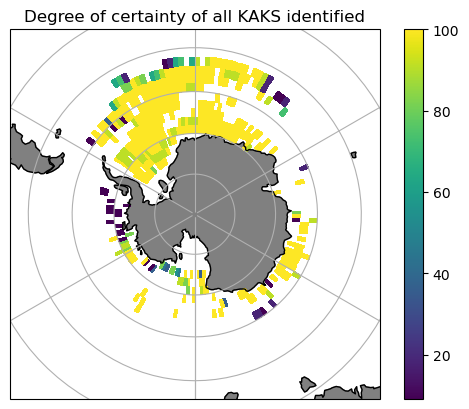

In [20]:
os.chdir('./Key_Areas_krill_carbon_sequestration/sensitivity_analyses/')
map_proj = ccrs.SouthPolarStereo()
p = array_certainty.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = True,
    subplot_kws={"projection": map_proj}, # the plot's projection
    #levels=[1, 2, 3, 4], 
    #colors = ['cornflowerblue', 'mediumaquamarine', 'coral'])  
)
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
plt.title('Degree of certainty of all KAKS identified')
#plt.savefig('degree_certainty_allKAKS.png')
plt.show(p)

### Degree of certainty of the KAKS presented in the main texte (ie. the T and O2 dep with average paramters' values)

In [21]:
certainty_KAKS_paper = coords.join(all_KAKS[['label_02_T_dep', 'degree_of_certainty']].dropna(), how = 'left')
array_certainty_KAKS_paper = xr.Dataset.from_dataframe(certainty_KAKS_paper.drop(['label_grid', 'label_02_T_dep'], axis = 1)) # convert into xarrayDataset
array_certainty_KAKS_paper = xr.Dataset.to_array(array_certainty_KAKS_paper)

In [22]:
array_certainty_KAKS_paper.mean() # 97.3%
array_certainty_KAKS_paper.min() # 63.6%

<xarray.DataArray ()>
array(63.63636364)

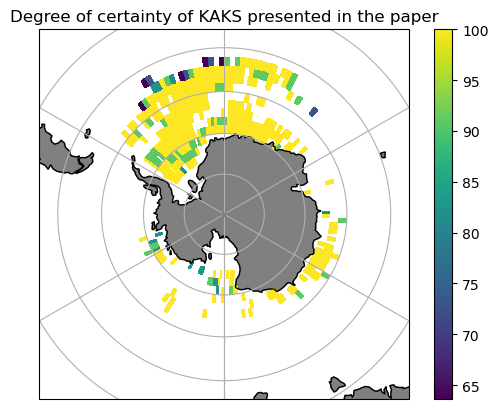

In [23]:
os.chdir('./Key_Areas_krill_carbon_sequestration/sensitivity_analyses/')
map_proj = ccrs.SouthPolarStereo()
p = array_certainty_KAKS_paper.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = True,
    subplot_kws={"projection": map_proj}, # the plot's projection
    #levels=[1, 2, 3, 4], 
    #colors = ['cornflowerblue', 'mediumaquamarine', 'coral'])  
)
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'degree of certainty', shrink = 0.8, boundaries = np.linspace(0,1,100))
plt.title('Degree of certainty of KAKS presented in the paper')
#plt.savefig('degree_certainty_KAKS_paper.png')
plt.show(p)

# Figure map of the categories

## Solve problem of regularity of the spatial grid before ploting

When some coordinates are missing in the dataset, the sptial grid when we plot is not regular, thus we first solve this problem by matching a regular grid, with all the cells of the study zone to our 'zone_data' dataset.

In [24]:
zones_no_dep = coords.join(zones_no_dep, how='left')
zones_T_dep = coords.join(zones_T_dep, how='left')
zones_O2_dep = coords.join(zones_O2_dep, how='left')
zones_02_T_dep = coords.join(zones_02_T_dep, how='left')
zones_high_Kremin = coords.join(zones_high_Kremin, how='left')
zones_low_Kremin = coords.join(zones_low_Kremin, how='left')
zones_high_Wsink = coords.join(zones_high_Wsink, how='left')
zones_low_Wsink = coords.join(zones_low_Wsink, how='left')
zones_high_KO2 = coords.join(zones_high_KO2, how='left')
zones_low_KO2 = coords.join(zones_low_KO2, how='left')
zones_altern_Tdep = coords.join(zones_altern_Tdep, how='left')

In [25]:
# transform in arrays to plot
array_zones_no_dep = xr.Dataset.from_dataframe(zones_no_dep.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_no_dep = xr.Dataset.to_array(array_zones_no_dep)
array_zones_T_dep = xr.Dataset.from_dataframe(zones_T_dep.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_T_dep = xr.Dataset.to_array(array_zones_T_dep)
array_zones_O2_dep = xr.Dataset.from_dataframe(zones_O2_dep.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_O2_dep = xr.Dataset.to_array(array_zones_O2_dep)
array_zones_02_T_dep = xr.Dataset.from_dataframe(zones_02_T_dep.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_02_T_dep = xr.Dataset.to_array(array_zones_02_T_dep)

array_zones_high_Kremin = xr.Dataset.from_dataframe(zones_high_Kremin.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_high_Kremin = xr.Dataset.to_array(array_zones_high_Kremin)
array_zones_low_Kremin = xr.Dataset.from_dataframe(zones_low_Kremin.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_low_Kremin = xr.Dataset.to_array(array_zones_low_Kremin)

array_zones_high_Wsink = xr.Dataset.from_dataframe(zones_high_Wsink.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_high_Wsink = xr.Dataset.to_array(array_zones_high_Wsink)
array_zones_low_Wsink = xr.Dataset.from_dataframe(zones_low_Wsink.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_low_Wsink = xr.Dataset.to_array(array_zones_low_Wsink)

array_zones_high_KO2 = xr.Dataset.from_dataframe(zones_high_KO2.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_high_KO2 = xr.Dataset.to_array(array_zones_high_KO2)
array_zones_low_KO2 = xr.Dataset.from_dataframe(zones_low_KO2.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_low_KO2 = xr.Dataset.to_array(array_zones_low_KO2)

array_zones_altern_Tdep = xr.Dataset.from_dataframe(zones_altern_Tdep.drop(['krill_adult_log', 'mean_seq_time', 'label_grid'], axis = 1)) # convert into xarrayDataset
array_zones_altern_Tdep = xr.Dataset.to_array(array_zones_altern_Tdep)

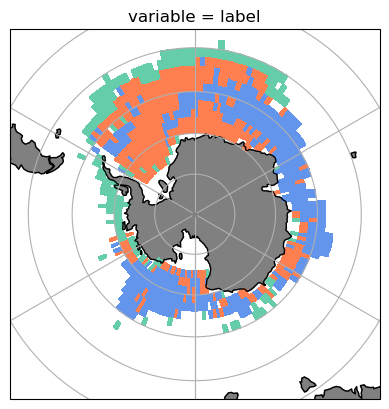

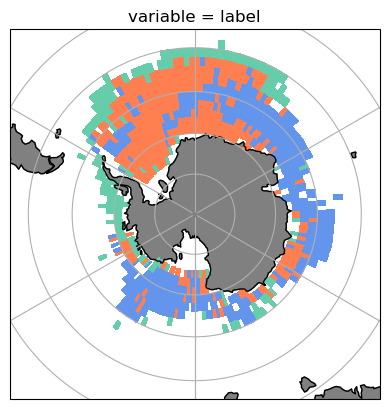

In [26]:
map_proj = ccrs.SouthPolarStereo()
os.chdir('./Key_Areas_krill_carbon_sequestration/figures/')
p = array_zones_no_dep.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors = ['cornflowerblue', 'mediumaquamarine', 'coral'])  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#plt.savefig('p_overlap_krill_carbon.png')
plt.show(p)

p = array_zones_T_dep.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors = ['cornflowerblue', 'mediumaquamarine', 'coral'])  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#plt.savefig('p_overlap_krill_carbon.png')
plt.show(p)

# Identification of COCA for each set of parameters

In [27]:
# Load the COCA previously calculted in the main text over the three period
os.chdir('./Key_Areas_krill_carbon_sequestration/output_results/')
COCA = pd.read_csv("COCA.csv")
COCA_p1 = pd.read_csv("COCA_p1.csv")
COCA_p2 = pd.read_csv("COCA_p2.csv")
COCA_p3 = pd.read_csv("COCA_p3.csv")

In [28]:
# add the degree of certainty of the KAKS that are COCA
COCA_p1 = COCA_p1.dropna().set_index(['latitude', 'longitude']).join(certainty_KAKS_paper, how = 'left')
COCA_p2 = COCA_p2.dropna().set_index(['latitude', 'longitude']).join(certainty_KAKS_paper.dropna(), how = 'left')
COCA_p3 = COCA_p3.dropna().set_index(['latitude', 'longitude']).join(certainty_KAKS_paper.dropna(), how = 'left')

In [29]:
COCA_p3.dropna().describe()

,label,label_grid,label_02_T_dep,degree_of_certainty
count,6.0,6.0,6.0,6.000000
mean,3.0,0.0,3.0,98.484848
std,0.0,0.0,0.0,3.711348
min,3.0,0.0,3.0,90.909091
25%,3.0,0.0,3.0,100.000000
50%,3.0,0.0,3.0,100.000000
75%,3.0,0.0,3.0,100.000000
max,3.0,0.0,3.0,100.000000


In [30]:
# transform into arrays to plot
array_COCA_p1 = xr.Dataset.from_dataframe(coords.join(COCA_p1.drop(['label', 'label_02_T_dep', 'label_grid'], axis = 1)).drop(['label_grid'], axis=1)) # convert into xarrayDataset
array_COCA_p1 = xr.Dataset.to_array(array_COCA_p1)

array_COCA_p2 = xr.Dataset.from_dataframe(coords.join(COCA_p2.drop(['label', 'label_02_T_dep', 'label_grid'], axis = 1)).drop(['label_grid'], axis=1)) # convert into xarrayDataset
array_COCA_p2 = xr.Dataset.to_array(array_COCA_p2)

array_COCA_p3 = xr.Dataset.from_dataframe(coords.join(COCA_p3.drop(['label', 'label_02_T_dep', 'label_grid'], axis = 1)).drop(['label_grid'], axis=1)) # convert into xarrayDataset
array_COCA_p3 = xr.Dataset.to_array(array_COCA_p3)

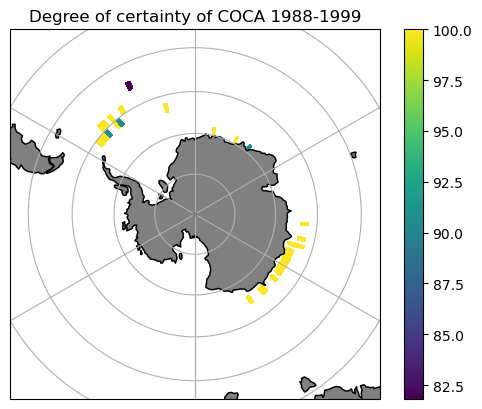

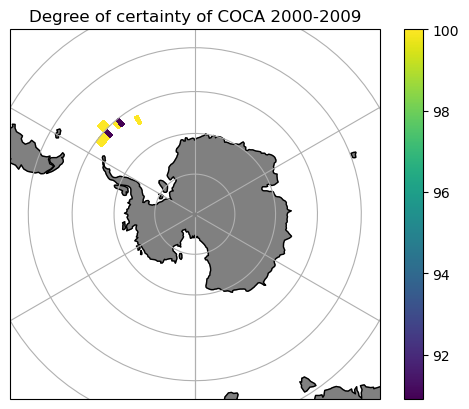

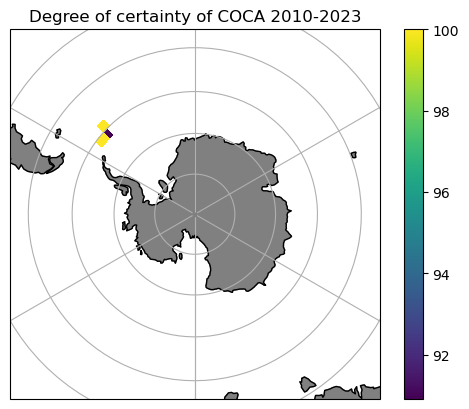

In [31]:
os.chdir('./Key_Areas_krill_carbon_sequestration/sensitivity_analyses/')
map_proj = ccrs.SouthPolarStereo()

p = array_COCA_p1.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = True,
    subplot_kws={"projection": map_proj} # the plot's projection
)  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
plt.title('Degree of certainty of COCA 1988-1999')
#plt.savefig('p_certainty_COCA_p1.png')
plt.show(p)

p = array_COCA_p2.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = True,
    subplot_kws={"projection": map_proj} # the plot's projection
)  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
plt.title('Degree of certainty of COCA 2000-2009')
#plt.savefig('p_certainty_COCA_p2.png')
plt.show(p)

p = array_COCA_p3.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = True,
    subplot_kws={"projection": map_proj} # the plot's projection
)  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
plt.title('Degree of certainty of COCA 2010-2023')
#plt.savefig('p_certainty_COCA_p3.png')
plt.show(p)

In [38]:
print(min(COCA_p1['degree_of_certainty']), min(COCA_p2['degree_of_certainty']), min(COCA_p3['degree_of_certainty']))

81.81818181818183 nan nan


In [42]:
COCA_p3

label  label_grid  label_02_T_dep  degree_of_certainty
latitude longitude                                                        
-67       69          1.0         NaN             NaN                  NaN
          71          1.0         NaN             NaN                  NaN
-65       41          1.0         NaN             NaN                  NaN
          43          1.0         NaN             NaN                  NaN
          55          1.0         NaN             NaN                  NaN
-63      -53          1.0         NaN             NaN                  NaN
-61      -53          3.0         0.0             3.0           100.000000
         -51          3.0         0.0             3.0           100.000000
         -49          3.0         0.0             3.0           100.000000
         -47          3.0         0.0             3.0            90.909091
-59      -47          3.0         0.0             3.0           100.000000
         -45          3.0         0.0             3.0           100.000000